In [27]:
import numpy as np 
import tensorflow as tf
import urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import os
import glob
from tensorflow import keras
import random
%matplotlib inline

In [5]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2022-02-17 13:18:38--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2022-02-17 13:18:38 (35.4 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [6]:
with open("mini_classes.txt","r") as f:
    classes = f.read()
    f.close()
classes = classes.split('\n')

Downloading data set

In [11]:
base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
os.mkdir('dataset')
for c in classes:
        cls_url = c.replace('_', '%20')
        path = base + cls_url + '.npy'
        try:
          urllib.request.urlretrieve(path, 'dataset/'+c+'.npy')
        except:
          print(cls_url)

In [13]:
from numpy.random.mtrand import rand
def get_data():
  tratio = 0.2
  max_items = 4000
  all_files = os.listdir('dataset/')
  all_files = ['dataset/' + i for i in all_files]
  x = np.empty([0,784])
  y = np.empty([0])
  class_names = []

  for index, file_name in enumerate(all_files):
    try:
      data = np.load(file_name)
      data = data[0:max_items,:]
      labels = np.full(data.shape[0],index)

      x = np.concatenate((x,data) , axis = 0 )
      y = np.append(y,labels)
      
      class_name, ext = os.path.splitext(os.path.basename(file_name))
      class_names.append(class_name)

    except:
      print("in except handeling")

  np.random.seed(1)
  random_list = np.random.permutation(y.shape[0])
  x = x[random_list,:]
  y = y[random_list]

  tratio = int(x.shape[0]*tratio)

  x_test = x[:tratio,:]
  y_test = y[:tratio]
  x_train = x[tratio:,:]
  y_train = y[tratio:]

  return x_train,y_train,x_test,y_test,class_names


In [14]:
x_train,y_train,x_test,y_test,class_names = get_data()

In [15]:
#Reshaping data
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

#Normilization
x_train /= 255.0
x_test /= 255.0


In [16]:
num_classes = len(class_names)
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [110]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='softmax')) 

In [111]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)        

In [112]:
model.fit(x = x_train,y =  y_train ,batch_size = 256, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 222s 177ms/step - loss: 1.8567 - top_k_categorical_accuracy: 0.7921
Epoch 2/5
1250/1250 [==============================] - 222s 178ms/step - loss: 1.2051 - top_k_categorical_accuracy: 0.8973
Epoch 3/5
1250/1250 [==============================] - 220s 176ms/step - loss: 1.0527 - top_k_categorical_accuracy: 0.9143
Epoch 4/5
1250/1250 [==============================] - 217s 174ms/step - loss: 0.9715 - top_k_categorical_accuracy: 0.9226
Epoch 5/5
1250/1250 [==============================] - 218s 174ms/step - loss: 0.9170 - top_k_categorical_accuracy: 0.9280


Evaluating the test set

In [113]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.36%


Predict random test set

eyeglasses


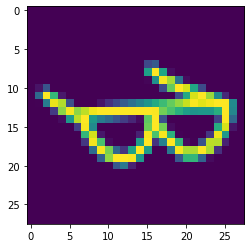

In [114]:
idx = random.randint(0, len(x_test))
x_pred = np.reshape(x_test[idx],(1,28,28,1))
result = model.predict(x_pred)
index = np.argmax(result,axis =1)[0]
print(class_names[index])
plt.imshow(np.reshape(x_test[idx],(28,28)))